In [1]:
# dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
# xception model
model = Xception(
    include_top=True,
    weights='imagenet')

In [3]:
# default image size
image_size = (299,299)

../project3/dataset/single_prediction/cat_or_dog_1.jpg


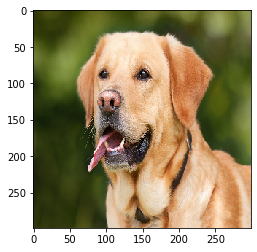

In [4]:
# load image and resize 
image_path = os.path.join("..", "project3", "dataset", "single_prediction", "cat_or_dog_1.jpg")
print(image_path)
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# preprocess image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02099712', 'Labrador_retriever', 0.6516866), ('n02099601', 'golden_retriever', 0.10669048), ('n02087394', 'Rhodesian_ridgeback', 0.03424174)]


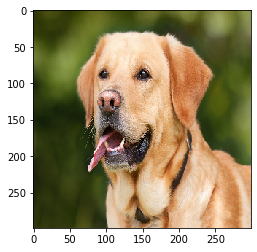

In [6]:
# predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    return  decode_predictions(predictions, top=3)[0]

In [8]:
image_path = os.path.join("..", "project3", "dataset", "single_prediction", "cat_or_dog_2.jpg")

cur_preds = predict(image_path)
cur_preds

[('n02124075', 'Egyptian_cat', 0.43581158),
 ('n02123045', 'tabby', 0.36341083),
 ('n02123159', 'tiger_cat', 0.09214013)]

In [9]:
# pred = decode_predictions(predictions, top=3)[0]
directory = "/Users/monicabustillos/Documents/project3/dataset/test_set/cats_dogs"
prediction_list = []
for file in os.listdir(directory)[:3]:
    if file.endswith(".jpg"):
        image_path = os.path.join("..", "project3", "dataset", "test_set", "cats_dogs", file)
        variable = predict(image_path)
#         print(variable)
        for item in variable:
            prediction_list.append({
                'Image': file,
                'Prediction': item[1],
                'Probability': item[2],
            })
       

In [10]:
prediction_list 

[{'Image': 'dog.4159.jpg',
  'Prediction': 'otterhound',
  'Probability': 0.26610667},
 {'Image': 'dog.4159.jpg',
  'Prediction': 'Tibetan_mastiff',
  'Probability': 0.24399997},
 {'Image': 'dog.4159.jpg',
  'Prediction': 'Dandie_Dinmont',
  'Probability': 0.0347592},
 {'Image': 'dog.4617.jpg', 'Prediction': 'malinois', 'Probability': 0.66501},
 {'Image': 'dog.4617.jpg',
  'Prediction': 'German_shepherd',
  'Probability': 0.0311504},
 {'Image': 'dog.4617.jpg',
  'Prediction': 'bull_mastiff',
  'Probability': 0.012744643},
 {'Image': 'dog.4171.jpg',
  'Prediction': 'Labrador_retriever',
  'Probability': 0.36691737},
 {'Image': 'dog.4171.jpg',
  'Prediction': 'flat-coated_retriever',
  'Probability': 0.11608953},
 {'Image': 'dog.4171.jpg',
  'Prediction': 'giant_schnauzer',
  'Probability': 0.115084656}]

In [11]:
import pickle

In [12]:
with open('pickle_ml.pickle', 'wb') as f:
    pickle.dump(prediction_list, f)
